# Gmail Smart Compose Case Study

# 1. Business problem

Gmail Smart Compose is a feature introduced in the popular Google email service back in 2018, which 
helps to save time on repetitive writing by suggesting relevant contextual phrases.
We engage in a lot of text-based communication on a daily basis. Most of the web and mobile apps 
today come with great features to improve productivity. For instance, WhatsApp offers a predictive text 
and Google search auto completes our queries with trending searches as you type in
Here the task is to build model which can predict the next words based up on input words. So here input 
is sequence and output also a sequence can output can a single word as well.
We are going to use sequence2 sequence models, Encoder-Decoder Architecture, Recurrent neural 
networks, RNN, LSTM and GRUs

# Dataset analysis

The biggest public email dataset available is the Enron email dataset, which contains approximately 
500,000 emails generated by employees of the Enron Corporation. It was obtained by the Federal 
Energy Regulatory Commission during its investigation of Enron’s collapse. Despite its relatively big size 
the usage of this dataset has faced different challenges. data set contain only two columns, the first 
column is the file’s name, and the second one is the message.

Data Source: - https://www.kaggle.com/datasets/wcukierski/enron-email-dataset?resource=download
        
Performance metric: -
For this problem I will be using perplexity and BLEU (Bilingual Evaluation Understudy)BLEU (Bilingual 
Evaluation Understudy) as performance metric.


# Performance metric

For this problem I will be using perplexity and BLEU (Bilingual Evaluation Understudy)BLEU (Bilingual 
Evaluation Understudy) as performance metric.
Perplexity :-
• Perplexity is a metric used to judge how good a language model is.

• We can define perplexity as the inverse probability of the test set, normalised by the number 
of words:
 
• Since we’re taking the inverse probability, hence lower perplexity indicates a better model.

• And we can interpret perplexity as the weighted branching factor. suppose for a model If we 
have a perplexity of 100, it means that whenever the model is trying to guess the next word it is 
as confused as if it had to pick between 100 words. Which is not good for our model.

More about this metric:- https://towardsdatascience.com/perplexity-in-language-models87a196019a94

BLEU:-
The Bilingual Evaluation Understudy Score, or BLEU for short, is a metric for evaluating a generated 
sentence to a reference sentence.
A perfect match results in a score of 1.0, whereas a perfect mismatch results in a score of 0.0.
The score was developed for evaluating the predictions made by automatic machine translation 
systems. It is not perfect, but does offer 5 compelling benefits:

• It is quick and inexpensive to calculate.

• It is easy to understand.

• It is language independent.

• It correlates highly with human evaluation.

• It has been widely adopted.


More about this metric:- https://towardsdatascience.com/perplexity-in-language-models87a196019a94

In [1]:
import numpy as np
from tqdm import tqdm
import email
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import re

# Loading the dataset csv files

In [2]:
emails_df  = pd.read_csv('../input/enron-email-dataset/emails.csv')

In [3]:
emails_df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


# Printing the shape of dataset

In [4]:
emails_df.shape

(517401, 2)

# Sample email data

In [5]:
print(emails_df['message'][4])

Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: greg.piper@enron.com
Subject: Re: Hello
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Greg Piper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Let's shoot for Tuesday at 11:45.  


# Extracting the mail content from message column for each data points

In [6]:
#https://www.adamsmith.haus/python/answers/how-to-get-the-body-of-an-email-in-python
def email_content(data):
    '''this function will get the email body text messsages'''
    mail_content = []
    for i in tqdm(data):
        message = email.message_from_string(i)
        mail_content.append(message.get_payload())
    return mail_content

In [7]:
mail_content=email_content(emails_df.message.values)

100%|██████████| 517401/517401 [01:21<00:00, 6365.03it/s]


# Sample Email content

In [8]:
mail_content[5]

'Greg,\n\n How about either next Tuesday or Thursday?\n\nPhillip'

# Adding the email_content to main dataframe

In [9]:
emails_df["mail_content"]=mail_content

# Final dataset 

In [10]:
emails_df.head()

,file,message,mail_content
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.


# Calculating the length of each mail content data points

In [11]:
%%time
emails_df['mail_content_len'] = emails_df['mail_content'].apply(len)

CPU times: user 200 ms, sys: 50.2 ms, total: 250 ms
Wall time: 249 ms


# Plotting the histograms for mail_content_length column

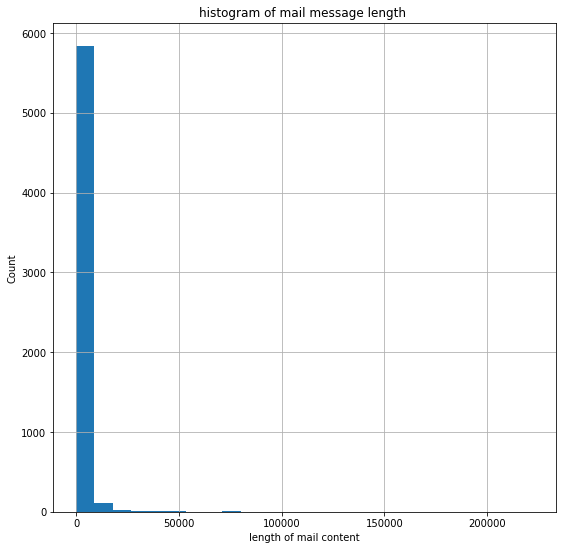

In [12]:
sample_mail=emails_df["mail_content_len"].sample(6000)
plt.figure(figsize=(9,9))
plt.hist(sample_mail,bins = 25)
plt.title("histogram of mail message length ")
plt.ylabel("Count")
plt.xlabel("length of mail content")
plt.grid()

# > Observations:-
1. As we have more than 5 lakh rows but for plotting the histogram we are using only 6000 rows
2. From above histrogram we can see that maximum message length are less than 20000 characters and there are very few messages whose length are more than more than 20000 character  

# Plotting the PDF plot

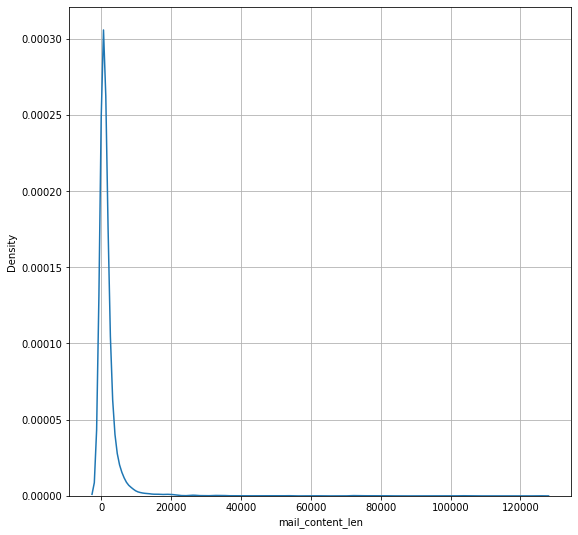

In [13]:
sample_mail=emails_df["mail_content_len"].sample(6000)
plt.figure(figsize=(9,9))
res = sns.distplot(sample_mail,hist=False)
plt.grid()
plt.show()

# > Observations:-
1. From above PDF plot we can see that the plot is peaked between 0 to 10k(approx) so that means we are more message which are having lenght between 0 to 10K characters and very few which are having message length more than 10k characters.
2. Also the pdf plot is have long tail .

# Plotting the CDF plot

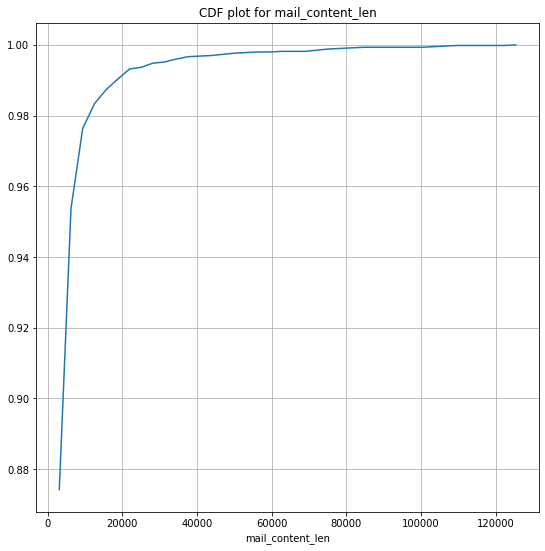

In [14]:
plt.figure(figsize=(9,9))
count ,bin_edges=np.histogram(sample_mail,bins=40,density=True)
pdf=count/(sum(count))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("mail_content_len")
plt.title("CDF plot for mail_content_len")
plt.grid()
plt.show()

# > Observations:-

1. From above CDF plot we can see that almost 98% message text length is less than 10k characters, So only 2% messages are have message text length more than 10K characters
2. Also from above plot we can conclude that in our dataset we have more messages which are having less than 10k characates  hence we are going to remove all the messages whcih are hacing message length more than 10k characters

# Checking the percentile values

In [15]:
T=emails_df["mail_content_len"].values
for i in range(0,101):
    p=np.percentile(T, i)
    print("{} percentile value {}".format(i,p))

0 percentile value 1.0
1 percentile value 19.0
2 percentile value 29.0
3 percentile value 39.0
4 percentile value 48.0
5 percentile value 58.0
6 percentile value 67.0
7 percentile value 77.0
8 percentile value 89.0
9 percentile value 100.0
10 percentile value 109.0
11 percentile value 121.0
12 percentile value 132.0
13 percentile value 143.0
14 percentile value 156.0
15 percentile value 167.0
16 percentile value 179.0
17 percentile value 191.0
18 percentile value 203.0
19 percentile value 214.0
20 percentile value 221.0
21 percentile value 235.0
22 percentile value 248.0
23 percentile value 262.0
24 percentile value 276.0
25 percentile value 288.0
26 percentile value 302.0
27 percentile value 316.0
28 percentile value 331.0
29 percentile value 345.0
30 percentile value 361.0
31 percentile value 377.0
32 percentile value 395.0
33 percentile value 412.0
34 percentile value 429.0
35 percentile value 447.0
36 percentile value 464.0
37 percentile value 482.0
38 percentile value 500.0
39 per

# Observaions:-
1. 25th percentile value is 288 which means 25 percent of messages have lenth less than 288 characters in a email.
2. 50th percentile value is 770 which means 50 percent of messages have lenth less than 770 characters in a email.
3. 75th percentile value 1757 which means 75 percent of messages have lenth less than 1757 characters in a email.
4. 90th percentile value 3657 which means 90 percent of messages have lenth less than 3657 characters in a email.
5. From 95th percentile value is 5909 and 99th percentile 16229, so in just 5% of data we have hude message lenght difference.  
5. Also from above we can see that 99 percentile email message value is 16229 and after 99 percentile message length values increases very fast.
6. Hence for building our model we will remove all the message which are having lenght less than 5909 charaters which is our 95th percentile value.

# Removing the message which are more than 5909 character length

In [16]:
emails_df_final = emails_df[(emails_df["mail_content_len"] > 0) & (emails_df["mail_content_len"]< 5909)]

In [17]:
emails_df_final.shape

(491522, 4)

In [18]:
emails_df.shape

(517401, 4)

In [19]:
#total % reduction in dataset
reduction=(emails_df_final.shape[0]/emails_df.shape[0])*100
reduction

94.99827020048279

# Observation:-
1. After removing all the messages which are having message length more than 6k charaters we lost approax 6% of data which is fine.

# After removing long message plotting the CDF plot

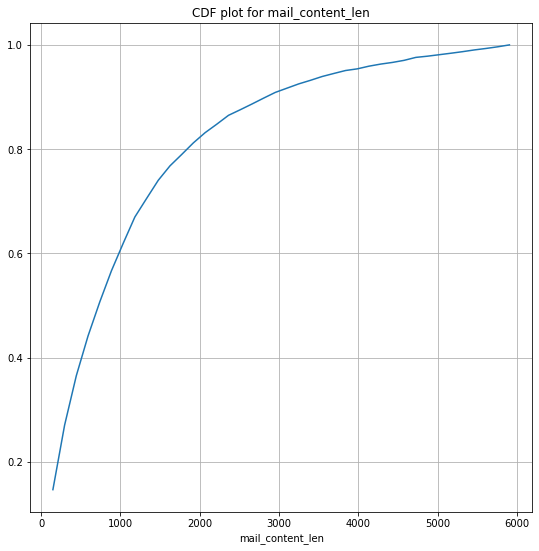

In [20]:
sample_mail_final=emails_df_final["mail_content_len"].sample(6000)
plt.figure(figsize=(9,9))
count ,bin_edges=np.histogram(sample_mail_final,bins=40,density=True)
pdf=count/(sum(count))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("mail_content_len")
plt.title("CDF plot for mail_content_len")
plt.grid()
plt.show()

# Observations:-
1. After removing the long messages from dataset now our CDF plot looks more smooth.
2. Almost 80% messages length is 2000 characters.

In [21]:
emails_df_final.head()

,file,message,mail_content,mail_content_len
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast\n\n,23
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,786
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!,30
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy,\n\n Can you send me a schedule of the s...",187
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.,35


# Dropping the file and message column from our dataset

In [22]:
emails_df_final.drop(["file","message"],axis=1,inplace=True)

In [23]:
emails_df_final.head()

,mail_content,mail_content_len
0,Here is our forecast\n\n,23
1,Traveling to have a business meeting takes the...,786
2,test successful. way to go!!!,30
3,"Randy,\n\n Can you send me a schedule of the s...",187
4,Let's shoot for Tuesday at 11:45.,35


# Data preprocessing/Cleaning

In [24]:
#https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/contractions.py
#defining the dictionary containing all the apostrophe/short words used in english text
CONTRACTION_MAP = {
"ain’t": "is not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he would",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"I’d": "I would",
"I’d’ve": "I would have",
"I’ll": "I will",
"I’ll’ve": "I will have",
"I’m": "I am",
"I’ve": "I have",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so as",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’ve": "you have"
}

In [25]:
def decontracted(text):
    '''this function will Replace all apostrophe/short words from text data'''
    for word in text.split():
        if word.lower() in CONTRACTION_MAP:
            text = text.replace(word, CONTRACTION_MAP[word.lower()])
    return text

In [26]:
def data_preprocess(text):
    '''This function will will preprocess the data by removing the puchuation digit email address and all non alphabet wrods from text.'''
    
    text=re.sub(r"<.*>", " ", text) # remove all the words that are enclose with <> 
    text=re.sub(r"\(.*\)", " ", text)# remove all the words that are enclose with ()
    text=re.sub(r"\d+", " ", text) # remove any digit from text
    text=re.sub(r"\w+:\s?", " ", text) # remove all the words which ends with ":".
    text=re.sub(r"_(\w+)_", r"\1", text) #remove the words which start and end with _       
    text=re.sub(r"_(\w+)", r"\1", text)#remove the words which start with _
    text=re.sub(r"(\w+)_", r"\1", text) #remove the words which  end with _    
    text=re.sub(r'\b\w{,1}\b' ,'', text)#remove the words which are greater than or equal to 1 
    text=re.sub(r"\b\w{12,}\b"," ",text) #remove the words which are greater than or equal to 12 
    text=re.sub(r"[^A-Za-z]", " ", text)
    text=re.sub(r"[\t\n\-\\\/]", " ", text) #remove all the newlines('\n'), tabs('\t'), "-", "\".
    
    text = text.split('forwarded by')[0] #remove forwarded messages from text 
    
    text=text.lower()
    #removing the punchuation
    punctuations = '()-[]{}?;:"\,<>/@#$%^&*_.' 
    no_punc = " "
    for char in text:
        if char not in punctuations:
            no_punc = no_punc + char.lower()
        else:
            no_punc+=" "  #if punchuation found add space
    final_text=no_punc.strip()
    
    words = final_text.split() 
    final_text = " ".join([w.strip() for w in words])

    return final_text

# Calling the preprocessing to remove puchuation and clean the dataset

In [27]:
%%time
emails_df_final['clean_mail_content'] = emails_df_final.apply(lambda x: data_preprocess(x["mail_content"]),axis=1)

CPU times: user 6min 28s, sys: 1.32 s, total: 6min 29s
Wall time: 6min 29s


# Calling decontracted functions to expand the short words

In [28]:
%%time
emails_df_final['clean_mail_content'] = emails_df_final.apply(lambda x: decontracted(x["clean_mail_content"]),axis=1)

CPU times: user 29.9 s, sys: 218 ms, total: 30.1 s
Wall time: 30.2 s


# After cleaning the dataset size

In [29]:
emails_df_final.shape

(491522, 3)

In [30]:
emails_df_final.head()

,mail_content,mail_content_len,clean_mail_content
0,Here is our forecast\n\n,23,here is our forecast
1,Traveling to have a business meeting takes the...,786,traveling to have business meeting takes the f...
2,test successful. way to go!!!,30,test successful way to go
3,"Randy,\n\n Can you send me a schedule of the s...",187,randy can you send me schedule of the salary a...
4,Let's shoot for Tuesday at 11:45.,35,let shoot for tuesday at


# Checking for duplicate 

In [32]:
emails_df_final["clean_mail_content"].duplicated().sum()

272392

In [33]:
#shape of dataset 
emails_df_final.shape

(491522, 3)

# Dropping all the duplicate from our dataset

In [34]:
 emails_df_final.drop_duplicates(subset = "clean_mail_content",inplace=True)

In [35]:
#after removing the duplicates message from dataset
emails_df_final.shape

(219130, 3)

# Sample data after removing the duplicates

In [36]:
pd.set_option('max_colwidth', -1)
emails_df_final["clean_mail_content"].head(20)

0     here is our forecast                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# Removing the sentences that contains rare words

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer_rare_words = Tokenizer(filters='')
tokenizer_rare_words.fit_on_texts(emails_df_final["clean_mail_content"].values)
word_index = tokenizer_rare_words.word_index
word_counts= tokenizer_rare_words.word_counts

In [38]:
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda kv: kv[1],reverse=True)) #sorting in decending order

In [39]:
len(sorted_word_counts)

186321

# plotting the bar plot for words and occurance of the words

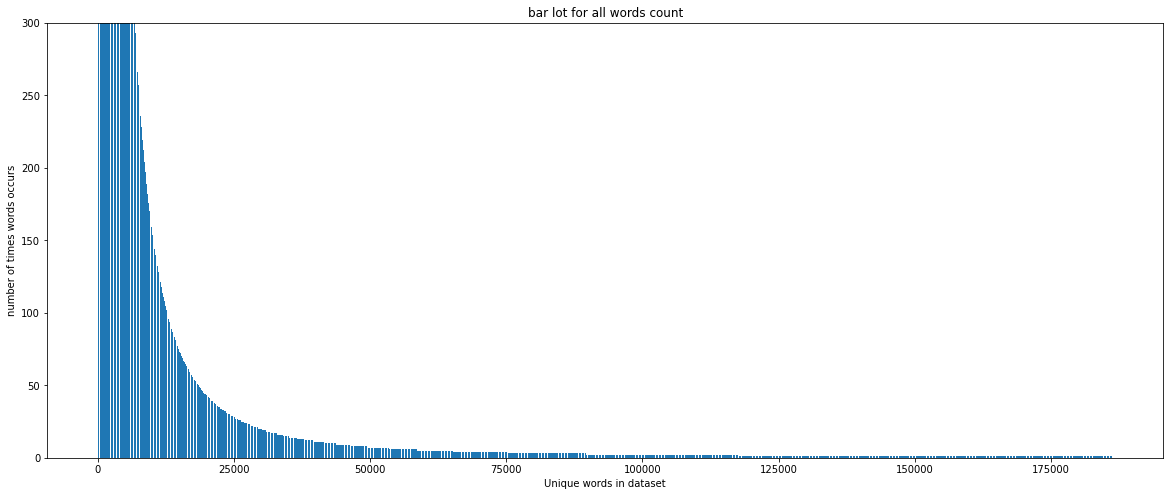

CPU times: user 5min 14s, sys: 5.54 s, total: 5min 20s
Wall time: 5min 19s


In [40]:
%%time
words = list(sorted_word_counts.keys())
counts = list(sorted_word_counts.values())
plt.figure(figsize=(20,8))
plt.bar(range(len(words)), counts)
plt.xlabel('Unique words in dataset')
plt.ylabel('number of times words occurs')
plt.title('bar lot for all words count')
plt.ylim(0,300)
plt.show()

# Observations:-
1. From above bar plot we can see that most of the frqueent words  occurs atleast 200 (approx) and there are very few words which are rare words and occurs less than 50 times.
2. So we will use 200 as thresold and will remove all  the words which are not occurs atleast 200 times in our corpus.

# Remvoing the rare words from corpus

In [41]:
vocab=[]
for i,j in sorted_word_counts.items():
    if j > 200:
        vocab.append(i)
print("final vocab size after removing the rare words ",len(vocab))

final vocab size after removing the rare words  8637


# Removing all the sentences that contains rare words 

In [42]:
#https://book.pythontips.com/en/latest/for_-_else.html#:~:text=for%20loops%20also%20have%20an,understand%20where%20to%20use%20them.
index_values=[]
for i in tqdm(range(emails_df_final["clean_mail_content"].shape[0])):
    for j in emails_df_final["clean_mail_content"].iloc[i].split():
        if j not in vocab:
            break
    else:
        index_values.append(i)

100%|██████████| 219130/219130 [01:55<00:00, 1895.40it/s]


Finally we got 40732 rows in our final dataset

In [43]:
len(index_values)

40732

In [44]:
Final_Data=emails_df_final.iloc[index_values]

# Final dataset shape

In [45]:
Final_Data.shape

(40732, 3)

In [46]:
Final_Data.head()

,mail_content,mail_content_len,clean_mail_content
0,Here is our forecast\n\n,23,here is our forecast
2,test successful. way to go!!!,30,test successful way to go
3,"Randy,\n\n Can you send me a schedule of the salary and level of everyone in the \nscheduling group. Plus your thoughts on any changes that need to be made. \n(Patti S for example)\n\nPhillip",187,randy can you send me schedule of the salary and level of everyone in the scheduling group plus your thoughts on any changes that need to be made phillip
4,Let's shoot for Tuesday at 11:45.,35,let shoot for tuesday at
5,"Greg,\n\n How about either next Tuesday or Thursday?\n\nPhillip",59,greg how about either next tuesday or thursday phillip


# Plotting the words cloud from final dataset

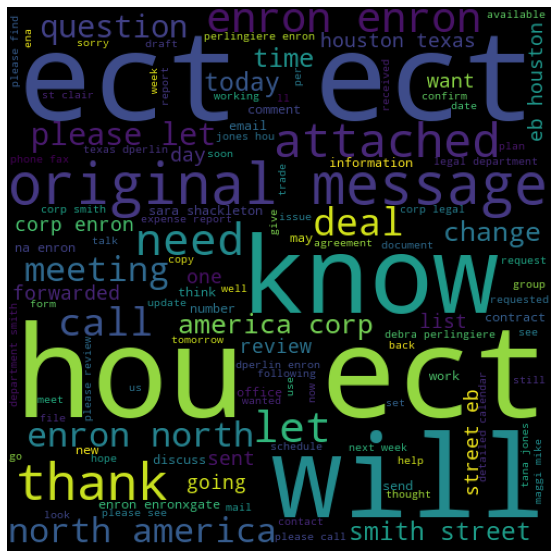

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
clean_mail_content = wc.generate(Final_Data["clean_mail_content"].str.cat(sep=" "))
plt.figure(figsize=(18,10))
plt.axis("off")
plt.imshow(clean_mail_content)

# Observations:
1. From above word cloud we can see the most frequent words are will,thank ect etc.

# Plotting the most common N-grams from our cleaned mail content (text)

In [48]:
def generate_N_grams(texts,ngram=2):
    '''this function will calcualte most common bigrams and trigrams for text data and plot the bar plot'''
    common_bigrams=[]
    for text in tqdm(texts):
        words=[word for word in text.split(" ")]  
        temp=zip(*[words[i:] for i in range(0,ngram)])
        bigrams=[' '.join(ngram) for ngram in temp]
        common_bigrams.extend(bigrams)
    count_n=Counter(common_bigrams).most_common(30)
    Nuteraltemp = pd.DataFrame(count_n)
    Nuteraltemp.columns = ['Common_words','count'] 
    fig,ax=plt.subplots(figsize=(15,8))
    sns.barplot(x = 'count',
            y = 'Common_words',
            data = Nuteraltemp)
    plt.show()

# Plotting the bar plot for most common 30 bigrams 

100%|██████████| 40732/40732 [00:00<00:00, 84674.24it/s]


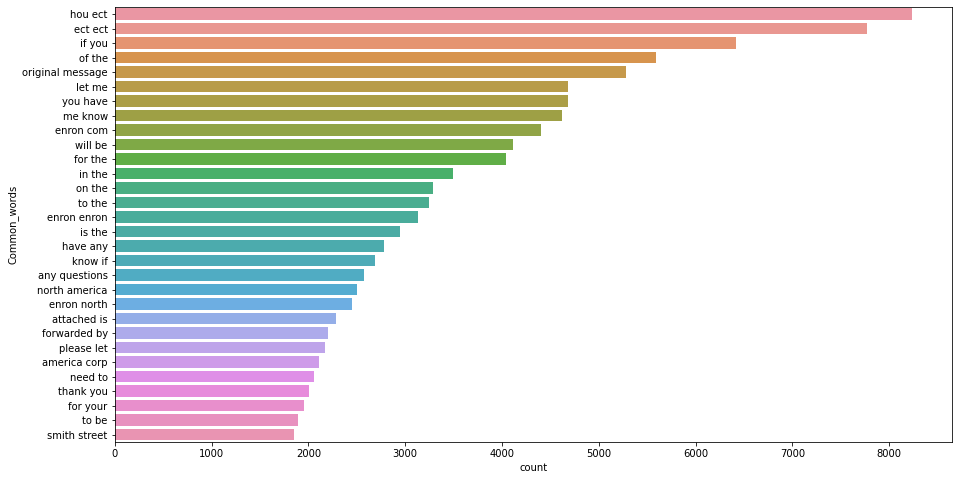

In [49]:
generate_N_grams(Final_Data["clean_mail_content"].values,2)

# Plotting the bar plot for most common 30 trigrams 

100%|██████████| 40732/40732 [00:00<00:00, 77457.76it/s]


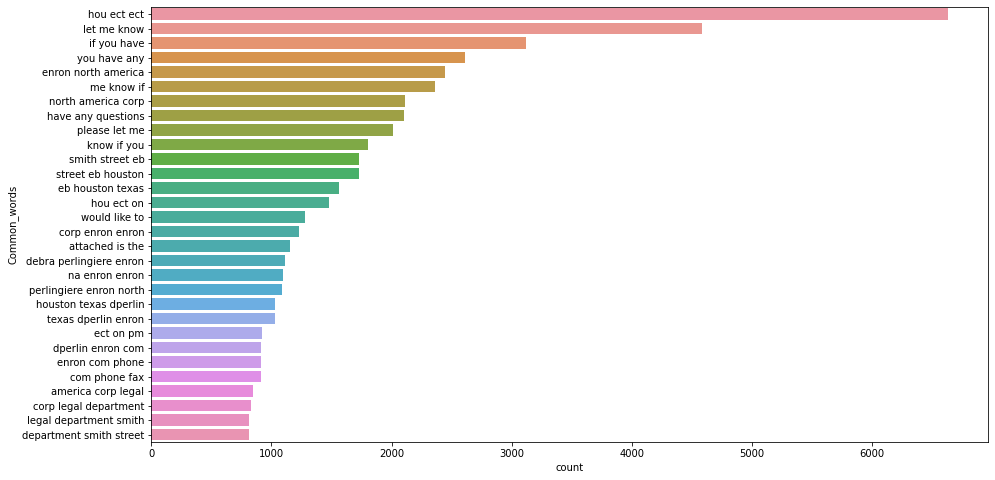

In [50]:
generate_N_grams(Final_Data["clean_mail_content"].values,3)

# Plotting the bar plot for most common 30 4grams 

100%|██████████| 40732/40732 [00:00<00:00, 55232.01it/s]


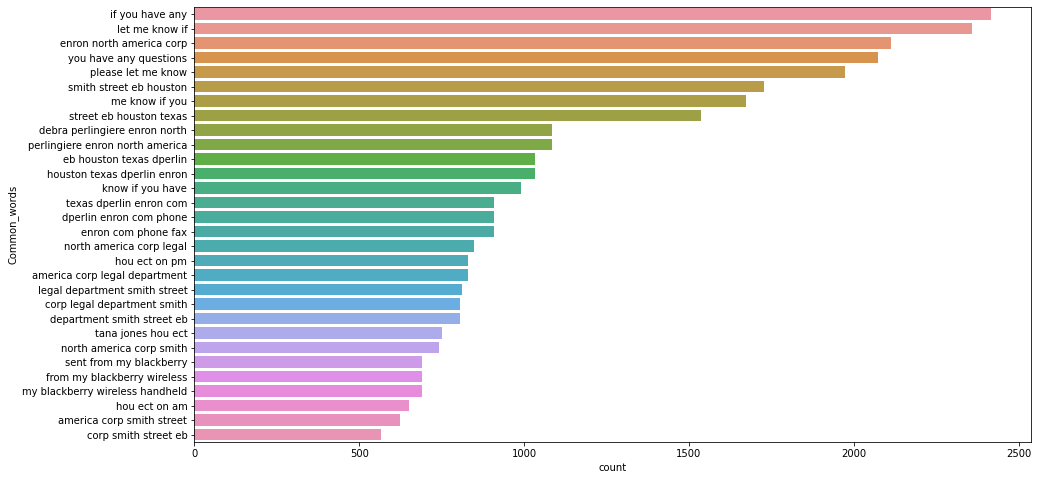

In [51]:
generate_N_grams(Final_Data["clean_mail_content"].values,4)

# Data preparation:-

In [52]:
Final_Data.shape

(40732, 3)

# Dropping the mail content and mail content length column 

In [54]:
Final_Data.drop(["mail_content","mail_content_len"],axis=1,inplace=True)

In [55]:
Final_Data.head()

,clean_mail_content
0,here is our forecast
2,test successful way to go
3,randy can you send me schedule of the salary and level of everyone in the scheduling group plus your thoughts on any changes that need to be made phillip
4,let shoot for tuesday at
5,greg how about either next tuesday or thursday phillip


# Performing the train test split

In [56]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(Final_Data,test_size=0.25,random_state=12,shuffle=True,)

In [57]:
print("train dataset size {}".format(train.size))
print("test dataset size {}".format(test.size))

train dataset size 30549
test dataset size 10183


In [58]:
train.head()

,clean_mail_content
64874,there are currently mws worth of submitted and awaiting approval for from the cec
515287,my is that is correct except for the delays associated with mark injury and equipment deliveries think we are getting close what do you think about energy clear original message andy zipper enron com andy zipper enron com thursday november pm chris edmonds enron update regarding the testing schedule my guys tell me we are just about finished on our end and will be getting ready to beta test how are your folks doing
295214,are you now back in the office when did you get back how is the baby good hope pl original message rodriguez cecilia wednesday november am love phillip hi cecilia rodriguez enron credit ph fax
366189,thanks michelle good job
400960,the payment status has changed on the following status last changed system expense report san juan outage mtg report amount due amount amount approval approved payment in progress to review this expense report click on the following link for concur expense expensexms enron com


# Preparing the data for train dataset

In [59]:
output=[]
for i in tqdm(train["clean_mail_content"].values):
    token_list=i.split()
    for j in range(len(token_list)-1):
        data = []
        x_ngram = '<start> ' + ' '.join(token_list[:j+1]) + ' <end>'
        y_ngram = '<start> ' + ' '.join(token_list[j+1:]) + ' <end>'
        data.append(x_ngram)
        data.append(y_ngram)
        output.append(data)
Final_Train_df = pd.DataFrame(output, columns=['input','output'])

100%|██████████| 30549/30549 [00:03<00:00, 10086.52it/s]


In [60]:
Final_Train_df.head()

,input,output
0,<start> there <end>,<start> are currently mws worth of submitted and awaiting approval for from the cec <end>
1,<start> there are <end>,<start> currently mws worth of submitted and awaiting approval for from the cec <end>
2,<start> there are currently <end>,<start> mws worth of submitted and awaiting approval for from the cec <end>
3,<start> there are currently mws <end>,<start> worth of submitted and awaiting approval for from the cec <end>
4,<start> there are currently mws worth <end>,<start> of submitted and awaiting approval for from the cec <end>


In [61]:
output=[]
for i in tqdm(test["clean_mail_content"].values):
    token_list=i.split()
    for j in range(len(token_list)-1):
        data = []
        x_ngram = '<start> ' + ' '.join(token_list[:j+1]) + ' <end>'
        y_ngram = '<start> ' + ' '.join(token_list[j+1:]) + ' <end>'
        data.append(x_ngram)
        data.append(y_ngram)
        output.append(data)
Final_Test_df = pd.DataFrame(output, columns=['input','output'])

100%|██████████| 10183/10183 [00:01<00:00, 8461.08it/s]


In [62]:
Final_Test_df.head(3)

,input,output
0,<start> have <end>,<start> you received everything that you need original message killen faith monday october am carter carol soft targets west gas hi carol can you send this to barry original message tycholiz barry monday october am killen faith soft targets west gas faith pls advise as to soft targets budget vs actuals year to date for west gas origination bt <end>
1,<start> have you <end>,<start> received everything that you need original message killen faith monday october am carter carol soft targets west gas hi carol can you send this to barry original message tycholiz barry monday october am killen faith soft targets west gas faith pls advise as to soft targets budget vs actuals year to date for west gas origination bt <end>
2,<start> have you received <end>,<start> everything that you need original message killen faith monday october am carter carol soft targets west gas hi carol can you send this to barry original message tycholiz barry monday october am killen faith soft targets west gas faith pls advise as to soft targets budget vs actuals year to date for west gas origination bt <end>


# Observation:-
1. From above we can clearly see that data is very noise and dirty we have do so much to cleaning to start worrking on modeling part.
2. Also we have to remove long messages as they will no help us in our modeling removal has been done for two purposes: long emails tend to be uncommon to be written again by the user and the increase the required memory and training time by a great amount.
3. Also in final model building we will remove all the rows having length more than 20 words as the model is aimed to learn common sentences which are usually below the threshold of 20 words.